# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [3]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return (x**2)*numpy.sin(x)

Ensure your function works with numpy arrays:

In [4]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [5]:
def g(x):
    '''Analytical integral of f(x).'''
    return -((x**2)*numpy.cos(x))+(2*x*numpy.sin(x))+(2*numpy.cos(x))-2

Check your solution with the same numpy array:

In [6]:
assert g(0) == 0.

In [7]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [8]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax)-g(xmin)

Check your analytic function:

In [9]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [10]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    delta_x=(xmax-xmin)/N
    x=xmin
    bracket_sum=f(x)+f(xmin+(N*delta_x))
    for i in range(1,N):
        x=xmin+(i*delta_x)
        bracket_sum+=2*f(x)
    for i in range(1,N+1):
        bracket_sum+=4*f(xmin+(i*delta_x)-(0.5*delta_x))
    return (delta_x/6)*bracket_sum

Make sure you have implemented Simpson's rule correctly:

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [12]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


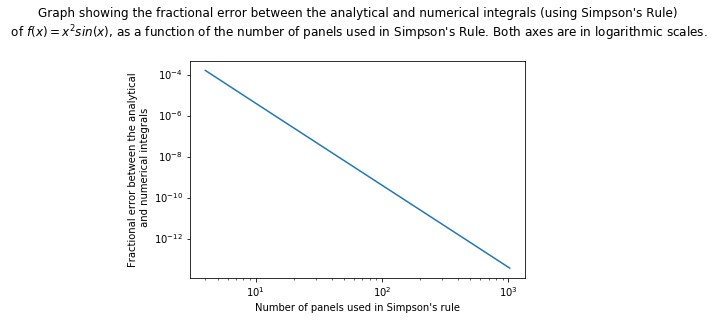

In [19]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)# Define reference value from analytical solution
fractional_errors=[]
for each in panel_counts:
    fractional_errors.append(((-(integrate_numeric(x0, x1, each))+result_analytic))/result_analytic)

plt.loglog(panel_counts,numpy.asarray(fractional_errors))
plt.title("Graph showing the fractional error between the analytical and numerical integrals (using Simpson's Rule)\n of $f(x)=x^{2}sin(x)$, as a function of the number of panels used in Simpson's Rule. Both axes are in logarithmic scales.\n ")
plt.xlabel("Number of panels used in Simpson's rule")
plt.ylabel("Fractional error between the analytical\n and numerical integrals")
plt.show()

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The (fractional) error estimate of numerical integration using Simpson's Rule goes as $N^{-4}$, where $N$ is the number of panels. If the number of panels is taken too large, larger and larger computational precision (rounding) errors will arise, leading to an increasing fractional error. Hence, there exists a number of panels for which the fractional error is minimisied using Simpson's rule. 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

If the trapezium rule were used, the fractional error would scale with $N^{-2}$, as opposed to $N^{-4}$. Furthermore, using the trapezium rule, we need to evaluate the function $N+1$ times at different values of $x$, as opposed to $2N+1$ times when using Simpson's rule. Hence, if we take $N$ to be too large, (thereby invoking large computational precision errors) we will accumulate greater computational precision errors using Simpson's rule compared to using the trapezium rule (because we need to evaluate the function a greater number of times).